# COVID-19 projections

**Author:** Felipe A. Millacura

**Date:** 15/01/2021

COVID-19 is a disease that has everyone under constant alert. An important aspect that authorities must consider is how much the disease is expected to disseminate and what kind of measures need to be taken in order to decrease the impact of the global pandemic.

This project considers the design and implementation of COVID-19 projection models and evaluates the impact of different measures currenlty being taken.

This will be done by _solving differential equations_ considering different stages of the infection. A basic example of this is the **SEIR model (Susceptible-Exposed-Infectious-Recovered)**. This model needs to be improved to incorporate varibles such as *limited PCR exams and hospitalised, critical and death patients*.

In [200]:
# Imports libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [4]:
from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

In [99]:
#Imports national data

df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv',
                error_bad_lines=False
                 )

df= df.set_index('Fecha')

In [100]:
df.head()

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos \nactivos confirmados
Fecha,,,,,,,,,,,,,,,,,
2020-03-02,1.0,1.0,0.0,0.0,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,2.0,3.0,0.0,0.0,3.0,NaN,2.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,1.0,4.0,0.0,0.0,4.0,NaN,1.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,1.0,5.0,0.0,0.0,5.0,NaN,1.0,5.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#Checking for data correlations

correlations = df[['Casos totales',
                   'Casos recuperados',
                   'Fallecidos',
                   'Casos activos',
                   'Casos nuevos totales',
                  'Casos nuevos con sintomas',
                  'Casos nuevos sin sintomas']].corr()
                   
px.imshow(correlations)

In [563]:
#Ploting Symptomatic cases

px.line(df['Casos totales'].rolling(7).mean().fillna(0),
        y= 'Casos totales',
        title= "Total cases of Covid19",
        labels= dict({'Casos totales':'Cases',
                     'Fecha':'Date'})
        )

In [539]:
real_data = np.array(df['Casos totales'].rolling(7).mean().fillna(1))

In [540]:
y_data = np.concatenate((np.zeros(30), real_data))

In [541]:
real_data.shape

(319,)

In [542]:
y_data.shape

(349,)

In [543]:
days = 30 + len(real_data)
x_data = np.linspace(0, days - 1, days, dtype=int) 

In [544]:
x_data.shape

(349,)

In [545]:
#model for a gaussian
def f(x, a, b, c):
    return gaussian(x, a, b, c) 

In [546]:
mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10, vary=True)
mod.set_param_hint("b", value=10, vary=True)
mod.set_param_hint("c", value=10, vary=True)
mod.set_param_hint("d", value=10, vary=True)
mod.set_param_hint("e", value=10, vary=True)

params = mod.make_params()

In [547]:
result = mod.fit(y_data, params, method="leastsq", x=x_data)  # fitting

In [548]:
result.best_values

{'a': 161735313.836371, 'b': 312.02590600618413, 'c': 111.5097634148967}

{'a': 161735313.836371, 'b': 312.02590600618413, 'c': 111.5097634148967}

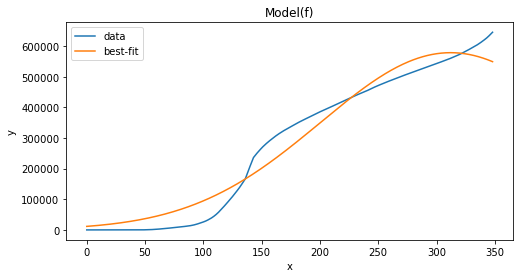

In [549]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

In [550]:
result

# Change over time

## SIR model

### Susceptible

\begin{equation} \frac{\partial S}{\partial t} = -\beta \cdot I \cdot \frac{S}{N} \end{equation}

### Exposed

\begin{equation}\frac{\partial E}{\partial t} = \beta \cdot I \cdot \frac{S}{N} - \delta E \end{equation}

### Infectious

\begin{equation}\frac{\partial I}{\partial t} = \delta E -(1-\alpha)\cdot \gamma I -\alpha\rho I\end{equation}

### Recovered

\begin{equation}\frac{\partial R}{\partial t} = (1-\alpha)\cdot\gamma I \end{equation}


### Dead

\begin{equation}\frac{\partial R}{\partial t} = \alpha\rho I \end{equation}

In [551]:
#defining derivatives

def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [552]:

#parameters
N = 18300000 #Chilean population; Source: World Bank
deaths_model = 0 #deaths
recovered_model = 0 #recovered
infectious_model = 3 #infectious
susceptible_model = N -1 #susceptible
exposed_model = 0 # contracted the disease but are not yet infectious 
D = 10 # Infectious lasts
gamma = 1/D
R0 = 2 # the total number of people an infected person infects
beta = R0*gamma # infected person infects beta people per day
alpha = 0.05 # five percent death rate
rho = 1/14 # fourteen days from infection until death
delta = 1/7  # incubation period of seven days
S0, E0, I0, R0, D0 = susceptible_model, exposed_model, infectious_model, R0, deaths_model  #Initial conditions


params_init_min_max = {"R_0": (1.0, 2.0, 5.0), 
                       "alpha": (0.05, 10,20), 
                       "rho": (1/10, 1/14, 1/21), 
                       "delta": (1/5, 1/7, 1/9),
                       "D": (5, 10, 14)
                      }  # form: {parameter: (initial guess, minimum value, max value)}

In [553]:
days = 30 + len(real_data)
x_data = np.linspace(0, days - 1, days, dtype=int) # Grid of time points (in days)
t=x_data

y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T



In [554]:
def Model(days, R_0,alpha,rho,delta,D):

    y0 = N-1.0, 1.0, 0.0, 0.0, 0.0,
    t = np.linspace(0, days-1, days)
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
    S, E, I, R, D = ret.T
    #R_0_over_time = [beta(i)/gamma for i in range(len(t))]

    return t, S, E, I, R, D

In [555]:
#model fitter for susceptible
def fitter(x, R_0, alpha, rho, delta, D):
    ret = Model(days, R_0,alpha,rho,delta,D)
    return ret[5][x]

In [556]:
mod = lmfit.Model(fitter)
# we set the parameters (and some initial parameter guesses)
for kwarg, (init, mini, maxi) in params_init_min_max.items():
    mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

params = mod.make_params()

In [557]:
params

name,value,initial value,min,max,vary
R_0,2.00000000,None,2.00000000,5.00000000,True
alpha,10.0000000,None,10.0000000,20.0000000,True
rho,0.04761905,None,0.07142857,0.04761905,True
delta,0.11111111,None,0.14285714,0.11111111,True
D,10.0000000,None,10.0000000,14.0000000,True


In [558]:
result = mod.fit(y_data, params, method="leastsq", x=x_data, nan_policy='omit')  # fitting

C:\Users\fmill\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



In [559]:
result.best_values


{'R_0': 2.0,
 'alpha': 10.0,
 'rho': 0.047619047619047616,
 'delta': 0.1111111111111111,
 'D': 10.0}

C:\Users\fmill\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning:

Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.



{'R_0': 2.0,
 'alpha': 10.0,
 'rho': 0.047619047619047616,
 'delta': 0.1111111111111111,
 'D': 10.0}

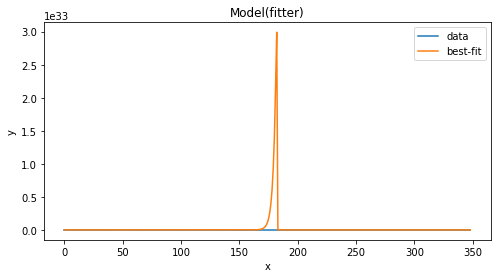

In [560]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

In [561]:
def plotseird(t, S, E, I, R, D):
      fig = go.Figure()
      fig.add_trace(go.Line(name="Susceptible", x=t, y=S, line_color="dark blue"))
      fig.add_trace(go.Line(name="Exposed", x=t, y=E, line_color="gold"))
      fig.add_trace(go.Line(name="Infectious", x=t, y=I, line_color="red"))
      fig.add_trace(go.Line(name="Recovered", x=t, y=R, line_color="green"))
      fig.add_trace(go.Line(name="Deaths", x=t, y=D, line_color="black"))
      fig.update_layout(title='SEIRD model',
                      yaxis_title='SEIRD cases',
                      xaxis_title='Date')
      return fig.show()

In [401]:
plotseird(t, S, E, I, R, D)

C:\Users\fmill\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [562]:
result

In [6]:
df.tail()

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos \nactivos confirmados
Fecha,,,,,,,,,,,,,,,,,
2021-01-10,2663.0,641923.0,NaN,17096.0,NaN,1391.0,4181.0,41818.0,NaN,NaN,583009.0,602861.0,21613.0,90241.0,4323.0,127.0,NaN
2021-01-11,2451.0,645892.0,NaN,17162.0,NaN,1363.0,3970.0,43864.0,NaN,NaN,584866.0,606055.0,22309.0,90567.0,4250.0,156.0,NaN
2021-01-12,2043.0,649135.0,NaN,17182.0,NaN,1045.0,3238.0,45149.0,NaN,NaN,586804.0,608804.0,22798.0,90777.0,4071.0,150.0,NaN
2021-01-13,2328.0,652525.0,NaN,17204.0,NaN,963.0,3394.0,46575.0,NaN,NaN,588746.0,611564.0,23407.0,91669.0,4427.0,103.0,NaN
2021-01-14,2725.0,656712.0,NaN,17294.0,NaN,1302.0,4177.0,47739.0,NaN,NaN,591679.0,614267.0,24800.0,92526.0,4743.0,150.0,NaN


In [6]:
#Looking for recovered data from 1st to 20th June

df.filter(like = '2020-06-', axis=0)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos \nactivos confirmados
Fecha,,,,,,,,,,,,,,,,,
2020-06-01,5082.0,105159.0,44946.0,1113.0,59100.0,389.0,5471.0,59100.0,NaN,NaN,44946.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02,3206.0,108686.0,NaN,1188.0,21325.0,321.0,3527.0,59107.0,21325.0,86173.0,48391.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-03,4537.0,113628.0,NaN,1275.0,21605.0,405.0,4942.0,60011.0,21605.0,90748.0,52342.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,4172.0,118292.0,NaN,1356.0,21305.0,492.0,4664.0,60711.0,21305.0,95631.0,56225.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,3790.0,122499.0,NaN,1448.0,21693.0,417.0,4207.0,60642.0,21693.0,99358.0,60409.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06,4888.0,127745.0,NaN,1541.0,22387.0,358.0,5246.0,62352.0,22387.0,103817.0,63852.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07,5760.0,134150.0,NaN,2190.0,24363.0,645.0,6405.0,65048.0,24363.0,107597.0,66912.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-08,4237.0,138846.0,NaN,2264.0,24334.0,459.0,4696.0,64849.0,24334.0,112248.0,71733.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-09,3587.0,142759.0,NaN,2283.0,23115.0,326.0,3913.0,64798.0,23115.0,117361.0,75678.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Ploting Symptomatic cases

px.line(df['Casos nuevos con sintomas'],
        y= 'Casos nuevos con sintomas',
        title= "Asymptomatic cases",
        labels= dict({'Casos nuevos con sintomas':'Number of Symptomatic cases',
                     'Fecha':'Date'})
        )

In [21]:
px.line(df['Casos nuevos sin sintomas'],
        y= 'Casos nuevos sin sintomas',
        title= "Asymptomatic cases",
        labels= dict({'Casos nuevos sin sintomas':'Number of Asymptomatic cases',
                     'Fecha':'Date'})
        )

In [76]:
#Ploting Total new Chilean cases

px.line(df['Casos nuevos totales'],
        y= 'Casos nuevos totales',
        title= "Daily cases",
        labels= {'Casos nuevos totales':'Number of cases',
                     'Fecha':'Date'}
        )

In [75]:
#Ploting Total Chilean cases

px.line(df['Casos totales'],
        y= 'Casos totales',
        title= "Total Chilean cases",
        labels= {'Fecha':'Date'}
        ).update_layout(
                    yaxis_title='Number of cases')

In [25]:
# Total cases in logarithmic scales

px.line(df['Casos totales'],
        y= 'Casos totales',
        title= "Total Chilean cases in logarithmic scale",
        labels= dict({'Casos totales':'Log10(Number of cases)',
                     'Fecha':'Date'}),
        log_y = True
        )

In [508]:
pcr_cases = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv')
pcr_cases.groupby('Region').sum()

,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
Region,,,,,,,,,,,,,,,,
2020-04-09,70.0,0.0,182,57,0.0,301,5383,68.0,397.0,364.0,592.0,124,0.0,341,10.0,73
2020-04-10,0.0,0.0,128,52,0.0,249,3185,0.0,219.0,0.0,149.0,148,91.0,199,0.0,24
2020-04-11,93.0,0.0,107,60,0.0,248,2105,74.0,0.0,259.0,281.0,126,0.0,178,0.0,46
2020-04-12,103.0,0.0,175,25,0.0,273,3861,0.0,341.0,189.0,469.0,184,0.0,225,7.0,45
2020-04-13,0.0,0.0,103,20,0.0,223,1850,74.0,113.0,65.0,0.0,232,0.0,39,0.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,897.0,1300.0,1895,913,839.0,2683,14620,1796.0,3201.0,565.0,4544.0,1798,844.0,4160,650.0,755
2021-01-14,1215.0,1452.0,2506,645,1288.0,4450,19939,1976.0,3180.0,1444.0,5778.0,2309,1585.0,5198,316.0,835
2021-01-15,1358.0,1268.0,2185,1104,1864.0,5274,20435,2742.0,3999.0,1723.0,6116.0,2136,1365.0,5801,699.0,908


In [31]:
pcr_cases = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv')
pcr_cases = pcr_cases.rename(columns={'Region':'Fecha'})
pcr_cases = pcr_cases.drop([0,1])
pcr_cases = pcr_cases.set_index('Fecha')
pcr_cases.head()

,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes
Fecha,,,,,,,,,,,,,,,,
2020-04-09,70.0,NaN,182,57,NaN,301,5383,68.0,397.0,364.0,592.0,124,NaN,341,10.0,73
2020-04-10,NaN,NaN,128,52,NaN,249,3185,NaN,219.0,NaN,149.0,148,91.0,199,NaN,24
2020-04-11,93.0,NaN,107,60,NaN,248,2105,74.0,NaN,259.0,281.0,126,NaN,178,NaN,46
2020-04-12,103.0,NaN,175,25,NaN,273,3861,NaN,341.0,189.0,469.0,184,NaN,225,7.0,45
2020-04-13,NaN,NaN,103,20,NaN,223,1850,74.0,113.0,65.0,NaN,232,NaN,39,NaN,45


In [73]:
px.line(pcr_cases,
        title= "PCR test per region",
        labels= {'Fecha':'Date'}
        ).update_layout(
                    yaxis_title='Number of PCR test')

### Background 

There is already information available about adapted SEIR models being used for modelling and fit diverse Covid19 data curves [1,2,3,4,5]. However, these agree that is utterly necesary to analyse each country under their own specific parameters, because the different approach taken against the pandemic, i.e. lockdown situations and population response to those measures behaves in a country specific way. For example, data for Chile has being analysed by Guerrero and Manríquez (2020) and Cabrera-Vives *et al* (2020). In both works cases were split into four main groups

- Susceptible (S(t)):  Fraction of each location’s population that is susceptible
- Exposed (E(t)):  Infected but not infectious
- Infectious (I(t)): Number of infectious people
- Recovered (R(t)): Number of recovered individuals as a function of time

Considering the variations of these variables as

\begin{equation} \frac{\partial S}{\partial t} = -\beta SI \end{equation}

\begin{equation}\frac{\partial E}{\partial t} = \beta SI -\sigma E \end{equation}

\begin{equation}\frac{\partial I}{\partial t} = \sigma E - \gamma I \end{equation}

\begin{equation}\frac{\partial R}{\partial t} = \gamma I \end{equation}

where 
             $\beta$ is the contagious rate, 
                     $\sigma^{-1}$ is the incubation period, 
 $\gamma^-1$ contagious period
 


However, Reiner *et al.* (2020) added new variables using COVID-19 hospital data, which allowed to estimate the number of individuals in hospital and in intensive care. Hospitalisation data therefore gets used in two ways: 
1. As a leading predictor of daily deaths 
2. As a statistic used to define the number of hospitalisations that result in deaths.

Also in this work other variables such as mobility, demography, altitude, population density, pollution, smoking, pneumonia seasonality, mask use, testing per capita and quarantine level were considered

\begin{equation} 
\frac{\partial S}{\partial t} = -\beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N} - \theta^+S
\end{equation}

\begin{equation}
\frac{\partial E}{\partial t} = \beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N}  -\sigma E + \theta^+ S - \theta^- E
\end{equation}

\begin{equation}
\frac{\partial I_1}{\partial t} = \sigma E - \gamma_1 I_1
\end{equation}

\begin{equation}
\frac{\partial I_2}{\partial t} = \gamma_1 I_1 - \gamma_2 I_2
\end{equation}

\begin{equation}
\frac{\partial R}{\partial t} = \gamma_2 I_2 + \theta^- E
\end{equation}

where 
- $\alpha$ represents a mixing coefficient to account for imperfect mixing within each location, 
- $\sigma$ is the rate at which infected individuals become infectious, 
- $\gamma_1$ is the rate at which infectious people transition out of the pre-symptomatic phase,
- $\gamma_2$ is the rate at which individuals recover. 
- $\theta$ are the corrections  mathematically described using $\theta^+$ and $\theta^-$ for the importation correction and the small location correction

This model does not distinguish between symptomatic and asymptomatic infections but has two infectious compartments ($I_1$ and $I_2$) to allow for interventions that would avoid focus on those who could not be symptomatic. $I_1$ is thus the pre-symptomatic compartment. 

These parameter values are drawn from distributions based on existing literature

$\beta$ regression coefficient constraints

Covariate | Time-varying | Lower Bound | Upper Bound | Covariate Coefficient | Definition
---|---|---|---|---|---
Pneumonia seasonality | Yes | 0.9 | 1.31 | 1.035 (0.90 to 1.31) | Proportion of pneumonia deaths to total deaths by week of the calendar year; by location
Mobility | Yes | 0 | ∞ | 9.45E-3 (95% UI: 7.10E-3 to 1.21E-2) | Composite indicator of multiple mobilitysources, expressed as percent reduction from "norm". Projected based on social distancing mandates
Mask Use | Yes | -0.52 | 0 | -0.502 (-0.520 to -0.380) | Percentage of the population who "always" wear a mask
Testing | Yes | -80 | 0 | -25.9 (-54.6 to -6.37) | Number of tests administered daily divided by population per location 
Air Quality | No | 0 | ∞ | 2.00E-5 (0.0 to 1.38E-4) | Population-weighted annual mean PM2.5 exposure 
Smoking Prevalence | No | 0 | 1 | 1.38E-2 (0.0 to 0.102) | Smoking exposure per capita (time invariant) (Adult age-standardised [15+ years], both sexes) 
LRI Mortality | No | 0 | ∞ | 5.89E-4 (0.0 to 4.65E-3) | age15+ age-standardised LRI mortality rate by location (time invariant, based on 2019 results) 
Altitude | No | 0 | ∞ | 1.38E-3 (0.0 to 8.97E-3) | Proportion population below 100 m altitude
Population Density | No | 0 |∞ | 2.5E-6 (0.0 to 4.6E-6) | Percentage of population living in areas more dense than 1,000 ppl per square km

Using the Runge-Kutta 4 algorithm the ODEs can be run forward to have a complete time-series of infections through the end of the year.



# Compartmentalisation

We separate population into several compartments, for example:
   - N: Total population
   - S: Susceptible (can still be infected, “healthy”)
   - E: Exposed (contracted the disease but is not yet infective) 
   - I: Infected (active cases)
   - R: Recovered (assuming were already infected and can't get infected again)
   - D: Dead (passed away from the disease)

Additional variables need to be used, such as:

 - $\beta$ (“beta”): the expected amount of people an infected person infects per day. For example, with a probability of 10% 10 people will infect 1 person per day (10% * 10 =10)
 - D: delay in number of days that an infected person has to spread the disease
 - $\gamma$: it's the rate of recovery, or the proportion of infected recovering per day $\gamma$:1/D
 - R₀: this is the basic reproduction number R₀, which is the total number of people an infected person infects. R₀: $\beta$*D. Hence R₀: $\beta / \gamma$
 - $\rho$: rate at which people die (e.g. when it takes 6 days to die, ρ will be 1/6)
 - $\alpha$: probability of going from infected to recovered and from infected to dead

In [29]:
# Considering the total chilean population

N = 18300000 #Chilean population; Source: World Bank

In [276]:
infectious[infectious.index =='2020-10-23'] #?????? missing value

## infectious[infectious.index =='2020-10-22'] = 13490
## infectious[infectious.index =='2020-10-24'] = 9990 




11740.0

In [274]:
infectious[infectious.index =='2020-10-22']

,Casos activos
Fecha,
2020-10-22,13490.0


In [270]:
infectious[infectious.index =='2020-10-24']

,Casos activos
Fecha,
2020-10-24,9990.0


In [277]:
# Infectious cases
infectious = df[['Casos activos']].fillna(np.mean([13490,9990])) # Chilean active cases

px.line(infectious,
        title= "Infectious people",
        labels= {'Fecha':'Date'},
        ).update_layout(
                    yaxis_title='Number of infectious cases')

In [194]:
# Recovered Cases
recovered1 = df['Casos recuperados'].dropna()
#df['Casos recuperados'] # Chilean recovered cases

px.line(recovered1,
        title="Recovered cases"
       ).update_layout(
                        yaxis_title='Number of recovered cases',
                        xaxis_title='Date'
                       )

In [195]:
# Recovered Cases
recovered2 = df['Casos confirmados recuperados'].dropna()
#df['Casos recuperados'] # Chilean recovered cases

px.line(recovered2,
        title="Recovered cases"
       ).update_layout(
                        yaxis_title='Number of recovered cases',
                        xaxis_title='Date'
                       )

In [196]:
#Looking for recovered data from 1st to 20th June
recovered3 = df.filter(like = '2020-06-', axis=0)['Casos recuperados por FD']

recovered3 = recovered3.drop(['2020-06-01',
                             '2020-06-21',
                             '2020-06-22',
                             '2020-06-23',
                             '2020-06-24',
                             '2020-06-25',
                             '2020-06-26',
                             '2020-06-27',
                             '2020-06-28',
                             '2020-06-29',
                             '2020-06-30'])

px.line(recovered3,
        title="Recovered cases"
       ).update_layout(
                        yaxis_title='Number of recovered cases',
                        xaxis_title='Date'
                       )

In [224]:
recovered4 = pd.DataFrame(pd.concat([recovered1,recovered3,recovered2]
                                    ),
                         columns=['Casos recuperados totales'])


px.line(recovered4,
        title="Total number of recovered cases"
       ).update_layout(
                        yaxis_title='Number of recovered cases',
                        xaxis_title='Date'
                       )

In [292]:
# Death cases
deaths = df[['Fallecidos']].fillna(0) #death cases

px.line(deaths,
        title="Total number of deaths"
       ).update_layout(
                        yaxis_title='Number of deaths',
                        xaxis_title='Date'
                       )


In [253]:
# Exposed cases

exposed = df[['Casos nuevos totales']].dropna()

#For MA7
## exposed.rolling(7).mean()


px.line(exposed,
        title="Total number of exposed people"
       ).update_layout(
                        yaxis_title='Number of exposed people',
                        xaxis_title='Date'
                       )


In [354]:
# Susceptible cases

susceptible['Casos susceptibles totales'] = N -exposed['Casos nuevos totales']- infectious['Casos activos'] - recovered4['Casos recuperados totales']-deaths['Fallecidos']
susceptible= pd.DataFrame(susceptible['Casos susceptibles totales'], columns=['Casos susceptibles totales'])
px.line(susceptible,
        title="Total number of susceptible people"
       ).update_layout(
                        yaxis_title='Number of susceptible people',
                        xaxis_title='Date'
                       )

In [28]:
import matplotlib.dates as mdates

def plotreal(S, E, I, R, D):
  fig = plt.figure(figsize=(10,4))
  ax = fig.subplots(1,1)
  ax.plot(S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Date')
  ax.set_ylabel('SR cases')
  ax.xaxis.set_tick_params(length=0)
  ax.yaxis.set_tick_params(length=1)

  ax2 = ax.twinx()
  ax2.plot(I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax2.plot(D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax2.set_ylabel('EID cases')

  # format the ticks
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_minor_locator(mdates.DayLocator())
  ax.tick_params(axis='x', labelrotation = 45)
    
  
  fig.legend(loc="upper right")

  plt.show();

In [408]:
import plotly.graph_objects as go
from plotly.graph_objs.scatter.marker import Line
def plotlyrealgo(S, E, I, R, D):
    
    fig = go.Figure()
    fig.add_trace(go.Line(name="Susceptible", x=S.index, y=np.log10(S.iloc[:, 0]), line_color="dark blue"))
    fig.add_trace(go.Line(name="Exposed", x=E.index, y=np.log10(E.iloc[:, 0]), line_color="gold"))
    fig.add_trace(go.Line(name="Infectious", x=I.index, y=np.log10(I.iloc[:, 0]), line_color="red"))
    fig.add_trace(go.Line(name="Recovered", x=R.index, y=np.log10(R.iloc[:, 0]), line_color="green"))
    fig.add_trace(go.Line(name="Deaths", x=D.index, y=np.log10(D.iloc[:, 0]), line_color="black"))
    fig.update_layout(title='SEIRD model real data',
                      yaxis_title='SEIRD cases',
                      xaxis_title='Date')
    return fig.show()
#exposed['Casos nuevos totales']- infectious['Casos activos'] - recovered4['Casos recuperados totales']-deaths['Fallecidos']

In [409]:
plotlyrealgo(susceptible,
         exposed, 
         infectious, 
         recovered4, 
         deaths)

C:\Users\fmill\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log10



In [305]:
def plotlyreal(S, E, I, R, D):
    seird= pd.concat([S,E,I,R,D])
    fig = px.line(seird,
                  title='SEIRD model real data', 
                  color_discrete_sequence=["red", "purple", "green", "black", "blue"],
                 ).update_layout(
                                    yaxis_title='SEIRD cases',
                                    xaxis_title='Date'
                                 )
    
   # fig.add_scatter(E['Fecha'],E, mode='lines')
    return fig

In [442]:
plotlyreal(susceptible,
         exposed, 
         infectious, 
         recovered4, 
         deaths)

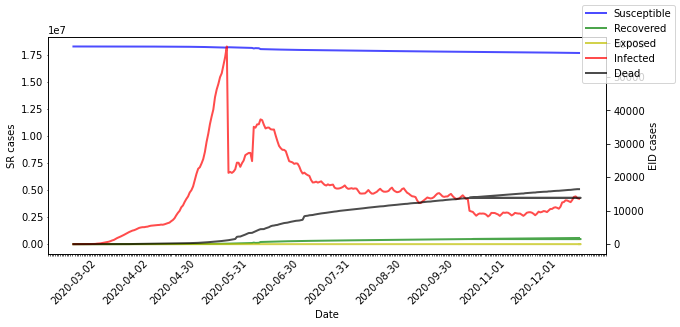

In [56]:
plotreal(susceptible,
         exposed, 
         infectious, 
         recovered4, 
         deaths
        )

In [425]:
#defining derivatives

def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt



In [443]:
N = 18300000 #Chilean population; Source: World Bank
deaths_model = 0 #deaths
recovered_model = 0 #recovered
infectious_model = 3 #infectious
susceptible_model = N -1 #susceptible
exposed_model = 0 # contracted the disease but are not yet infectious 
D = 10 # Infectious lasts
gamma = 1/D
R0 = 2 # the total number of people an infected person infects
beta = R0*gamma # infected person infects beta people per day
alpha = 0.05 # five percent death rate
rho = 1/14 # fourteen days from infection until death
delta = 1/7  # incubation period of seven days
S0, E0, I0, R0, D0 = susceptible_model, exposed_model, infectious_model, R0, deaths_model  #Initial conditions


In [484]:
t = np.linspace(0, 700) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T



In [492]:
def plotsir(t, S, I, R):
      fig = go.Figure()
      fig.add_trace(go.Line(name="Susceptible", x=t, y=S, line_color="dark blue"))
     # fig.add_trace(go.Line(name="Exposed", x=t, y=E, line_color="gold"))
      fig.add_trace(go.Line(name="Infectious", x=t, y=I, line_color="red"))
      fig.add_trace(go.Line(name="Recovered", x=t, y=R, line_color="green"))
    #  fig.add_trace(go.Line(name="Deaths", x=t, y=D, line_color="black"))
      fig.update_layout(title='SIR model',
                      yaxis_title='SIR cases',
                      xaxis_title='Date')
      return fig.show()


In [491]:
#SIR model

plotsir(t, S, I, R)

In [477]:
def plotseir(t, S, E, I, R):
      fig = go.Figure()
      fig.add_trace(go.Line(name="Susceptible", x=t, y=S, line_color="dark blue"))
      fig.add_trace(go.Line(name="Exposed", x=t, y=E, line_color="gold"))
      fig.add_trace(go.Line(name="Infectious", x=t, y=I, line_color="red"))
      fig.add_trace(go.Line(name="Recovered", x=t, y=R, line_color="green"))
    #  fig.add_trace(go.Line(name="Deaths", x=t, y=D, line_color="black"))
      fig.update_layout(title='SEIR model',
                      yaxis_title='SEIR cases',
                      xaxis_title='Date')
      return fig.show()

In [490]:
# SEIR model

plotseir(t, S, E, I, R)

In [488]:
def plotseird(t, S, E, I, R, D):
      fig = go.Figure()
      fig.add_trace(go.Line(name="Susceptible", x=t, y=S, line_color="dark blue"))
      fig.add_trace(go.Line(name="Exposed", x=t, y=E, line_color="gold"))
      fig.add_trace(go.Line(name="Infectious", x=t, y=I, line_color="red"))
      fig.add_trace(go.Line(name="Recovered", x=t, y=R, line_color="green"))
      fig.add_trace(go.Line(name="Deaths", x=t, y=D, line_color="black"))
      fig.update_layout(title='SEIRD model',
                      yaxis_title='SEIRD cases',
                      xaxis_title='Date')
      return fig.show()

In [489]:
plotseird(t, S, E, I, R, D)